In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import scipy.optimize as opt
import pandas as pd
from scipy import stats
from scipy.optimize import Bounds

%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

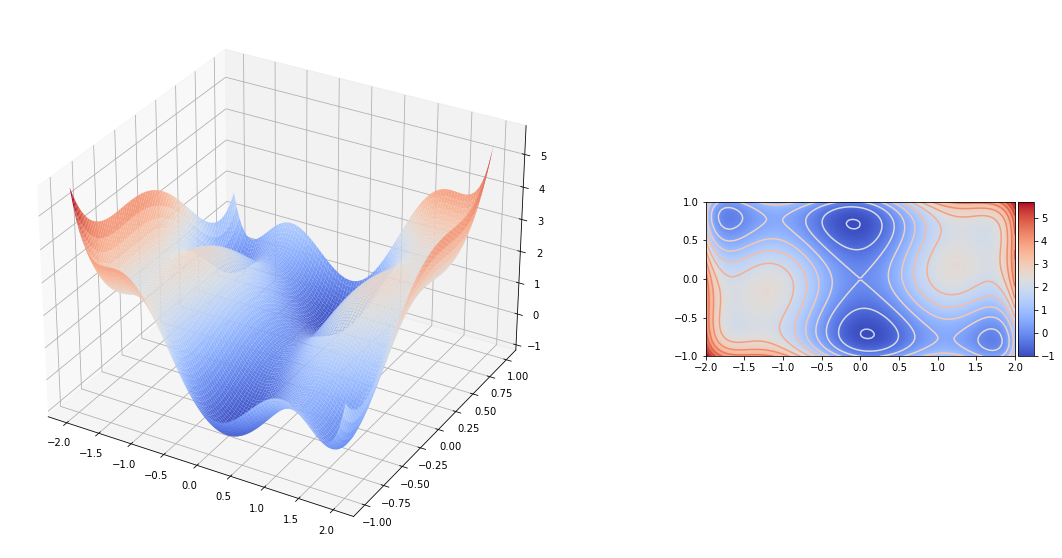

In [2]:
# function
def f(parameters):
    x, y = parameters
    return (4 - 2.1*x**2 + x**4/3.) * x**2 + x * y + (4*y**2 - 4) * y**2

# domain
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-1, 1, 100)
x, y = np.meshgrid(xs, ys)

# plot layout
fig = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=2, projection='3d')
ax2 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)

# 3d plot
ax1.plot_surface(x, y, f((x,y)), cstride=1, rstride=1, cmap='coolwarm')

# heat map and contour plot
im = ax2.imshow(f((x,y)), cmap='coolwarm', origin='lower', extent=[-2, 2, -1, 1])
ax2.contour(x, y, f((x,y)), cmap='coolwarm', levels=np.arange(-6, 6, 0.5))

# add colorbar
divider = make_axes_locatable(ax2)
cax2 = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax2, orientation='vertical')

# show
plt.show()

In [3]:
'''
    Once the minimum points have been identified
    thanks to the previous plots, I define bounds to
    search for the points using scipy.optimize.minimize().
'''

# specify bounds: splits [-1,1] in half and [-2,2] in three parts
bounds = [Bounds([-2, -1], [-1, 0]), Bounds([-1, -1], [1, 0]), Bounds([1, -1], [2, 0]), 
          Bounds([-2,  0], [-1, 1]), Bounds([-1,  0], [1, 1]), Bounds([1,  0], [2, 1])]

# initial starting point [x0, y0]
p0 = [[-1.5, -0.5], [0., -0.5], [1.5, -0.5],
      [-1.5,  0.5], [0.,  0.5], [1.5,  0.5]]

print("Minimizing the function...")

# unzip the bounds
for guess, bound in zip(p0, bounds):

    # apply algorithm 
    res = sp.optimize.minimize(f, guess, bounds=bound)
    resPar = res.x
    x_min, y_min = resPar
    print("\nx_min =", x_min,"\ty_min =", y_min,
          "\tf(x_min, y_min) =", f(resPar))

Minimizing the function...

x_min = -1.6071049259309291 	y_min = -0.5686518877757405 	f(x_min, y_min) = 2.1042503103121803

x_min = 0.08984198577303741 	y_min = -0.7126564008428005 	f(x_min, y_min) = -1.0316284534898745

x_min = 1.703607010539061 	y_min = -0.796083820093631 	f(x_min, y_min) = -0.21546382438224965

x_min = -1.7036069919488375 	y_min = 0.7960838106157976 	f(x_min, y_min) = -0.2154638243823992

x_min = -0.08984199331080775 	y_min = 0.7126563923206907 	f(x_min, y_min) = -1.0316284534898752

x_min = 1.6071049470809051 	y_min = 0.5686518804518959 	f(x_min, y_min) = 2.1042503103122043


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Comment: Absolutely reasonable because all data were shown as perfectly.
Yes, time offset for min and max temperatures the same within the fit accuracy.


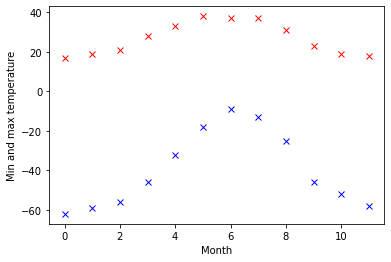

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline


max_temperatures = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temperatures = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

#1-Plotting these temperatures.

#Defininng months by creating arrray between 0-12
months = np.arange(12)

#Red color was used for maximum temperatues and blue color was used for minimum temperatures
plt.plot(months, max_temperatures , 'rx')
plt.plot(months, min_temperatures, 'bx')

#Labeling axes
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

#2-Find a suitable a function that can describe min and max temperatures.

def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max_temperatures, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min_temperatures, [-40, 20, 0])


print("Comment: Absolutely reasonable because all data were shown as perfectly.")
print("Yes, time offset for min and max temperatures the same within the fit accuracy.")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Fit results:

 Gaussian:
A = 1437.93 +- 60.33
Mean (mu) = -0.09 +- 0.01
Sigma = 0.25 +- 0.01

 Parabolic background (ax^2+bx+c):
a = -2.03 +- 0.55
b = -3.84 +- 0.77
c = 26.04 +- 3.35

 Chi squared: 489.97 
 Pvalue: 0.00000


--2022-01-22 00:00:16--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-22 00:00:16--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9a5cd763767efcc0763e9afefa.dl.dropboxusercontent.com/cd/0/inline/BePoUeMxuJLw2XKd2VVm94SoNgEaVimIrTMR0iA_X_vhQ91r2NQ5oQBc3HfGeY5YB7LI8JRSYGzUEE1MmG0heQYfqvCcgOUxSE3HDnHk_beXAZO-Be1dVCY02FXgjjpwUMbkvPxjUG0xvimygVphxj95/file# [following]
--2022-01-22 00:00:17--  https://uc9a5cd763767efcc0763e9afefa.dl.dropboxusercontent.com/cd/0/inline/BePoUeMxuJLw2XKd2VVm94SoNgEaVimIrTMR0iA_X_vhQ91r2NQ5oQBc

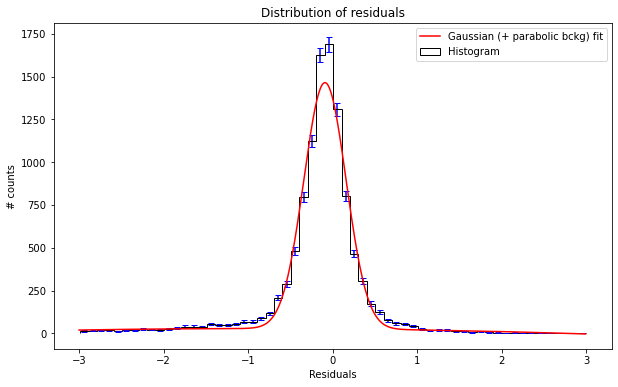

In [5]:
# get data
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
    #!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
data = pd.read_pickle("data/residuals_261.pkl")
df = pd.DataFrame(data.item())
df = df[df["residuals"].abs() < 3.] #I exclude the tails of the distribution


#Create an histogram with the appropriate binning and display it.
residuals = df["residuals"]
fig, ax = plt.subplots(figsize=(10, 6))

h, bins, _ = ax.hist(residuals, bins=60, color="black", histtype="step", label="Histogram")
ax.set_title("Distribution of residuals")
ax.set_xlabel("Residuals")
ax.set_ylabel("# counts")

#Poisson uncertainty for each bin
bin_centers = .5*(bins[:-1] + bins[1:])
sigmay = np.sqrt(h)
ax.errorbar(bin_centers, h, yerr=sigmay, color= "blue",  linestyle = "None", capsize=3)


#Define an appropriate function and fit it to the histogram of the residuals

def gaus(x, A, mu, sigma):
    return A*np.exp(-(x - mu)**2 / (2 * sigma**2))
def parabola(x,a,b,c):
    return a*x**2+b*x+c
def fitfunct(x, A, mu, sigma, a,b,c):
    return gaus(x, A, mu, sigma) + parabola(x,a,b,c)
    

xpoints=np.arange(-3,3,0.01)
par, par_cov = optimize.curve_fit(fitfunct, bin_centers, h, sigma =sigmay)

print("Fit results:")
print("\n Gaussian:")
print("A = %.2f +- %.2f" % (par[0], np.sqrt(par_cov[0,0])))
print("Mean (mu) = %.2f +- %.2f" % (par[1], np.sqrt(par_cov[1,1])))
print("Sigma = %.2f +- %.2f" % (par[2], np.sqrt(par_cov[2,2])))
print("\n Parabolic background (ax^2+bx+c):")
print("a = %.2f +- %.2f" % (par[3], np.sqrt(par_cov[3,3])))
print("b = %.2f +- %.2f" % (par[4], np.sqrt(par_cov[4,4])))
print("c = %.2f +- %.2f" % (par[5], np.sqrt(par_cov[5,5])))


ax.plot(xpoints, fitfunct(xpoints, *par), color="red", label = "Gaussian (+ parabolic bckg) fit")
plt.legend(loc="upper right")



#Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?
from scipy import stats

ndof = len(bin_centers) - 1 # 
chi2 = np.sum(((h - fitfunct(bin_centers, *par))**2) / (sigmay**2))
pvalue = 1. - stats.chi2.cdf(chi2, ndof)

print("\n Chi squared: %.2f " % chi2)
print(" Pvalue: %.5f" % pvalue)

#A reasonable pvalue threshold to consider valid the results of a fit is p>0.05: the probability that the residuals actually follows a gaussian (+bckg) distribution must be >5%.

#The resulting pvalue is 0, so below the treshold, so the results of the fit must be rejected: the fit function doesn't properly fit the data.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

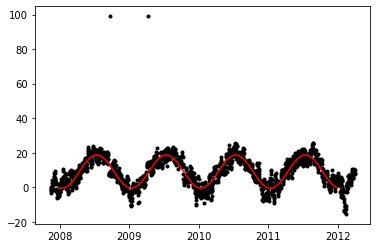

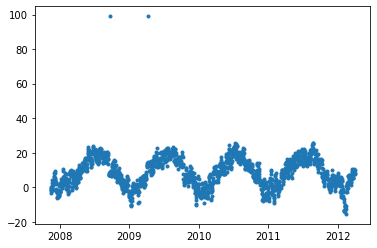

In [10]:
import numpy as np
from scipy.optimize import curve_fit

date,temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

def f2(t, a, c, d):
    return a * np.cos(2 * np.pi * t + c) + d

popt, pcov = curve_fit(f2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.',color='black')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, f2(xfine, *popt), color='red')


def g2(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt, pcov = curve_fit(g2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.')
xfine = np.linspace(2008, 2012, 100)